In [1]:
import pandas as pd
import numpy as np
from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
df=pd.read_csv(r"../data/attrition_data.csv")
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [3]:
df.columns

Index(['EMP_ID', 'ANNUAL_RATE', 'HRLY_RATE', 'JOBCODE', 'ETHNICITY', 'SEX',
       'MARITAL_STATUS', 'JOB_SATISFACTION', 'AGE', 'NUMBER_OF_TEAM_CHANGED',
       'REFERRAL_SOURCE', 'HIRE_MONTH', 'REHIRE', 'TERMINATION_YEAR',
       'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'PERFORMANCE_RATING',
       'DISABLED_EMP', 'DISABLED_VET', 'EDUCATION_LEVEL', 'STATUS',
       'JOB_GROUP', 'PREVYR_1', 'PREVYR_2', 'PREVYR_3', 'PREVYR_4', 'PREVYR_5',
       'A', 'B', 'C', 'D', 'E', 'experience'],
      dtype='object')

In [4]:
x=df.drop(['EMP_ID','STATUS','TERMINATION_YEAR','HIRE_MONTH','A', 'B', 'C', 'D', 'E'], axis=1)
y=df['STATUS']


In [5]:
x = pd.get_dummies(x, columns=['JOB_GROUP','ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'REFERRAL_SOURCE', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'EDUCATION_LEVEL'])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


In [7]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train) 

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [8]:
y_pred = xgb_model.predict(x_test)

In [9]:
print (accuracy_score(y_pred,y_test))

0.7676837725381415


In [10]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt

from matplotlib.pyplot import figure
fig= plt.figure(figsize=(30,30))

# plot feature importance
plot_importance(xgb_model)
plt.show()

<Figure size 3000x3000 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 1800x1800 with 0 Axes>

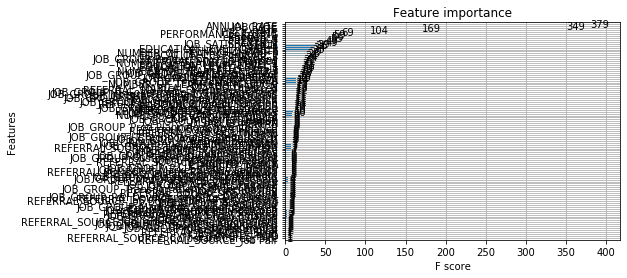

In [11]:
fig = plt.gcf()
fig.set_size_inches(25, 25,forward=True)
plot_importance(xgb_model)
plt.show()

In [12]:
print(precision_recall_fscore_support(y_pred,y_test))

(array([0.83076923, 0.68625894]), array([0.77363897, 0.75856014]), array([0.80118694, 0.7206005 ]), array([1745, 1139]))


In [13]:
print(precision_recall_fscore_support(y_test,y_pred))

(array([0.77363897, 0.75856014]), array([0.83076923, 0.68625894]), array([0.80118694, 0.7206005 ]), array([1625, 1259]))


###EDA


In [14]:
##logistic regression

from sklearn.linear_model import LogisticRegression
x_train=x_train.drop(['ANNUAL_RATE'],axis=1)
x_test=x_test.drop(['ANNUAL_RATE'],axis=1)

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred=clf.predict(x_test)

#y_pred=clf.predict_proba(x_test)


print (accuracy_score(y_pred,y_test))

0.613384188626907


/home/farid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#x_train=x_train.drop(['ANNUAL_RATE'],axis=1)
#x_test=x_test.drop(['ANNUAL_RATE'],axis=1)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
#neigh.score(y_pred,y_test)

In [16]:
y_test.to_numpy()

array([0, 0, 1, ..., 0, 0, 1])

In [17]:
print (accuracy_score(y_pred,y_test))

0.7128987517337032


###Random forest


In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 


rf_model = RandomForestRegressor(random_state=5,max_depth=15,n_estimators=150 )
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [20]:
print (accuracy_score(y_pred.round(),y_test))

0.7461858529819695
